In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [2]:
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anuradha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv("Reviews.csv")
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df = pd.read_csv("Reviews.csv")
df.shape


(568454, 10)

In [5]:
df = df[['Text', 'Score']]
df.rename(columns={'Text': 'review', 'Score': 'rating'}, inplace=True)
df.head()


,review,rating
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [6]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

df['clean_review'] = df['review'].apply(clean_text)


In [7]:
def sentiment_label(r):
    if r >= 4:
        return "Positive"
    elif r == 3:
        return "Neutral"
    else:
        return "Negative"

df['sentiment'] = df['rating'].apply(sentiment_label)


In [8]:
vectorizer = TfidfVectorizer(
    max_features=3000,   # reduced to avoid crash
    ngram_range=(1,1)
)

X = vectorizer.fit_transform(df['clean_review'])
y = df['sentiment']


In [9]:
from sklearn.model_selection import train_test_split

# 70% Train, 30% Temp (Val + Test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

# Split Temp into 15% Validation, 15% Test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=42,
    stratify=y_temp
)


In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [11]:
from sklearn.metrics import classification_report

val_pred = model.predict(X_val)

print("Validation Results:\n")
print(classification_report(y_val, val_pred))


Validation Results:

              precision    recall  f1-score   support

    Negative       0.72      0.65      0.68     12305
     Neutral       0.50      0.16      0.24      6396
    Positive       0.89      0.97      0.93     66567

    accuracy                           0.86     85268
   macro avg       0.70      0.59      0.62     85268
weighted avg       0.84      0.86      0.84     85268



In [12]:
test_pred = model.predict(X_test)

print("Test Results:\n")
print(classification_report(y_test, test_pred))


Test Results:

              precision    recall  f1-score   support

    Negative       0.73      0.66      0.69     12306
     Neutral       0.52      0.17      0.25      6396
    Positive       0.89      0.97      0.93     66567

    accuracy                           0.86     85269
   macro avg       0.71      0.60      0.63     85269
weighted avg       0.84      0.86      0.84     85269



In [13]:
!pip install transformers torch


Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
      --------------------------------------- 0.2/12.0 MB 6.1 MB/s eta 0:00:02
     -- ------------------------------------- 0.6/12.0 MB 8.1 MB/s eta 0:00:02
     --- ------------------------------------ 1.0/12.0 MB 7.7 MB/s eta 0:00:02
     ---- ----------------------------------- 1.4/12.0 MB 8.3 MB/s eta 0:00:02
     ------ --------------------------------- 1.9/12.0 MB 8.7 MB/s eta 0:00:02
     ------- -------------------------------- 2.3/12.0 MB 8.8 MB/s eta 0:00:02
     --------- ------------------------------ 2.8/12.0 MB 8.8 MB/s eta 0:00:02
     ---------- ----------------------------- 3.2/12.0 MB 9.0 MB/s eta 0:00:01
     ------------ --------------------------- 3.7/12.0 MB 9.0 MB/s eta 0:00:01
     ------------- -------------------------- 4.1/12.0 MB 9.0 MB/s eta 0:00:01
     --------------- ------------------------ 4.6/12.0 MB 9.2 MB/s eta 0:00:01
     ----------------- ---------------------- 5.1/12.0 MB 

In [14]:
from transformers import pipeline

llm_sentiment = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)


C:\Users\Anuradha\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Anuradha\AppData\Roaming\Python\Python310\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Anuradha\.cache\huggingface\hub\models--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Pyt

In [15]:
llm_sentiment("The food taste was excellent but delivery was very slow")


[{'label': 'NEGATIVE', 'score': 0.9952268600463867}]

In [16]:
sample_reviews = df['review'].sample(100, random_state=42)

df_llm = sample_reviews.apply(
    lambda x: llm_sentiment(x)[0]['label']
)

df_llm.head()


165256    POSITIVE
231465    POSITIVE
427827    NEGATIVE
433954    NEGATIVE
70260     POSITIVE
Name: review, dtype: object

In [17]:
def llm_generate_insights(reviews):
    insights = {
        "POSITIVE": 0,
        "NEGATIVE": 0
    }

    for review in reviews:
        label = llm_sentiment(review)[0]['label']
        insights[label] += 1

    return insights

llm_generate_insights(sample_reviews)


{'POSITIVE': 71, 'NEGATIVE': 29}

In [18]:
def final_llm_business_insight(reviews):
    counts = llm_generate_insights(reviews)

    positive = counts.get("POSITIVE", 0)
    negative = counts.get("NEGATIVE", 0)

    if positive > negative:
        return "LLM Insight: Overall customer sentiment is positive. Focus on maintaining quality and scaling operations."

    else:
        return "LLM Insight: Customer dissatisfaction detected. Immediate improvements required in delivery and service."


In [19]:
final_llm_business_insight(sample_reviews)


'LLM Insight: Overall customer sentiment is positive. Focus on maintaining quality and scaling operations.'

In [20]:
# Predict sentiment on full dataset using ML model
full_predictions = model.predict(X)

# Count sentiments
import pandas as pd
full_sentiment_counts = pd.Series(full_predictions).value_counts()

full_sentiment_counts


Positive    480453
Negative     73823
Neutral      14178
Name: count, dtype: int64

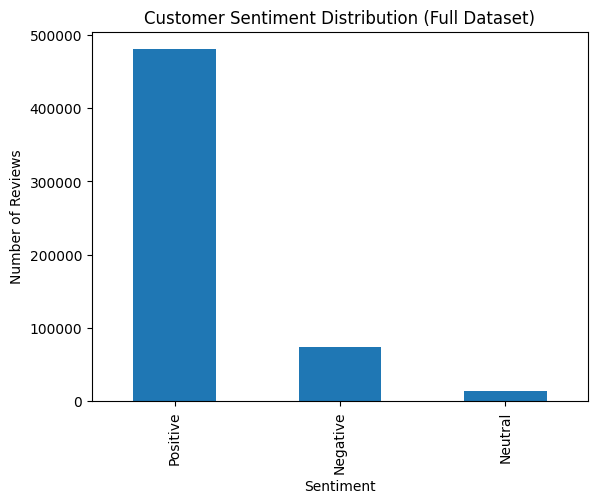

In [21]:
import matplotlib.pyplot as plt

full_sentiment_counts.plot(kind='bar')
plt.title("Customer Sentiment Distribution (Full Dataset)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


In [24]:
def safe_llm_label(text, max_words=200):
    # limit text length 
    words = str(text).split()
    short_text = " ".join(words[:max_words])
    return llm_sentiment(short_text)[0]['label']


# Apply LLM on 1000 reviews safely
llm_reviews = df['review'].sample(1000, random_state=42)

llm_labels = llm_reviews.apply(safe_llm_label)

llm_counts = llm_labels.value_counts()
llm_counts


review
POSITIVE    688
NEGATIVE    312
Name: count, dtype: int64

In [25]:
def final_project_insight(model, X, llm_counts):
    # ML full-dataset prediction (NO printing)
    full_predictions = model.predict(X)
    full_counts = pd.Series(full_predictions).value_counts()

    full_pos = full_counts.get("Positive", 0)
    full_neg = full_counts.get("Negative", 0)
    full_neu = full_counts.get("Neutral", 0)

    llm_pos = llm_counts.get("POSITIVE", 0)
    llm_neg = llm_counts.get("NEGATIVE", 0)

    return f"""
FINAL AI INSIGHT – FOOD FEEDBACK ANALYSIS

📊 Full Dataset (ML Analysis):
• Positive Reviews : {full_pos}
• Negative Reviews : {full_neg}
• Neutral Reviews  : {full_neu}

🤖 LLM Deep Analysis (Sampled Reviews):
• Positive Reviews : {llm_pos}
• Negative Reviews : {llm_neg}

Final Conclusion:
Overall customer sentiment is POSITIVE. Most customers are satisfied with food quality and taste.
Negative feedback highlights improvement areas mainly related to delivery speed and service experience.

Business Recommendations:
• Maintain food quality and consistency
• Improve delivery operations
• Strengthen customer support based on feedback
"""

print(final_project_insight(model, X, llm_counts))



FINAL AI INSIGHT – FOOD FEEDBACK ANALYSIS

📊 Full Dataset (ML Analysis):
• Positive Reviews : 480453
• Negative Reviews : 73823
• Neutral Reviews  : 14178

🤖 LLM Deep Analysis (Sampled Reviews):
• Positive Reviews : 688
• Negative Reviews : 312

Final Conclusion:
Overall customer sentiment is POSITIVE. Most customers are satisfied with food quality and taste.
Negative feedback highlights improvement areas mainly related to delivery speed and service experience.

Business Recommendations:
• Maintain food quality and consistency
• Improve delivery operations
• Strengthen customer support based on feedback

